## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  24.673230  1097.385355  0.538240  7.030958  1.633957
1  27.370419   337.685811  0.838536  7.293297  1.643447
2  59.972813  1419.701650  0.922954  5.187366  1.711183
3  85.662978  1381.071763  0.001073  9.711000 -0.151101
4  61.752745   717.681374  0.938971  2.894027  1.585940


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8552108	total: 57ms	remaining: 57s
1:	learn: 0.8479478	total: 57.6ms	remaining: 28.7s
2:	learn: 0.8420036	total: 58.2ms	remaining: 19.3s
3:	learn: 0.8362703	total: 58.7ms	remaining: 14.6s
4:	learn: 0.8269697	total: 59.3ms	remaining: 11.8s
5:	learn: 0.8188174	total: 59.7ms	remaining: 9.9s
6:	learn: 0.8109976	total: 60.3ms	remaining: 8.55s
7:	learn: 0.8040201	total: 60.9ms	remaining: 7.54s
8:	learn: 0.7977806	total: 61.3ms	remaining: 6.75s
9:	learn: 0.7897435	total: 61.8ms	remaining: 6.12s
10:	learn: 0.7819454	total: 62.3ms	remaining: 5.6s
11:	learn: 0.7741559	total: 62.8ms	remaining: 5.17s
12:	learn: 0.7676177	total: 63.3ms	remaining: 4.81s
13:	learn: 0.7597103	total: 63.7ms	remaining: 4.49s
14:	learn: 0.7536708	total: 64.1ms	remaining: 4.21s
15:	learn: 0.7474861	total: 64.7ms	remaining: 3.98s
16:	learn: 0.7410913	total: 65.2ms	remaining: 3.77s
17:	learn: 0.7357401	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7288152	total: 66ms	remaining: 3.41s


137:	learn: 0.3280848	total: 115ms	remaining: 720ms
138:	learn: 0.3260606	total: 116ms	remaining: 718ms
139:	learn: 0.3238217	total: 116ms	remaining: 714ms
140:	learn: 0.3218487	total: 117ms	remaining: 711ms
141:	learn: 0.3195723	total: 117ms	remaining: 708ms
142:	learn: 0.3175488	total: 118ms	remaining: 705ms
143:	learn: 0.3163412	total: 118ms	remaining: 701ms
144:	learn: 0.3146018	total: 118ms	remaining: 698ms
145:	learn: 0.3133471	total: 119ms	remaining: 695ms
146:	learn: 0.3115435	total: 119ms	remaining: 693ms
147:	learn: 0.3102039	total: 120ms	remaining: 689ms
148:	learn: 0.3081956	total: 120ms	remaining: 686ms
149:	learn: 0.3061099	total: 120ms	remaining: 682ms
150:	learn: 0.3043494	total: 121ms	remaining: 679ms
151:	learn: 0.3028972	total: 121ms	remaining: 677ms
152:	learn: 0.3015219	total: 122ms	remaining: 674ms
153:	learn: 0.3003768	total: 122ms	remaining: 671ms
154:	learn: 0.2989532	total: 122ms	remaining: 667ms
155:	learn: 0.2979991	total: 123ms	remaining: 665ms
156:	learn: 

297:	learn: 0.1696661	total: 184ms	remaining: 435ms
298:	learn: 0.1687763	total: 185ms	remaining: 434ms
299:	learn: 0.1683048	total: 186ms	remaining: 433ms
300:	learn: 0.1674194	total: 186ms	remaining: 432ms
301:	learn: 0.1668550	total: 187ms	remaining: 431ms
302:	learn: 0.1664550	total: 187ms	remaining: 431ms
303:	learn: 0.1660785	total: 188ms	remaining: 429ms
304:	learn: 0.1656972	total: 188ms	remaining: 429ms
305:	learn: 0.1653102	total: 189ms	remaining: 428ms
306:	learn: 0.1645943	total: 189ms	remaining: 427ms
307:	learn: 0.1642266	total: 189ms	remaining: 425ms
308:	learn: 0.1638627	total: 190ms	remaining: 425ms
309:	learn: 0.1630093	total: 190ms	remaining: 424ms
310:	learn: 0.1621765	total: 191ms	remaining: 423ms
311:	learn: 0.1617813	total: 192ms	remaining: 422ms
312:	learn: 0.1613929	total: 192ms	remaining: 421ms
313:	learn: 0.1605625	total: 192ms	remaining: 420ms
314:	learn: 0.1603335	total: 193ms	remaining: 419ms
315:	learn: 0.1597978	total: 193ms	remaining: 418ms
316:	learn: 

554:	learn: 0.0889894	total: 297ms	remaining: 238ms
555:	learn: 0.0889231	total: 297ms	remaining: 237ms
556:	learn: 0.0885904	total: 298ms	remaining: 237ms
557:	learn: 0.0884851	total: 298ms	remaining: 236ms
558:	learn: 0.0883817	total: 299ms	remaining: 236ms
559:	learn: 0.0882654	total: 299ms	remaining: 235ms
560:	learn: 0.0879211	total: 299ms	remaining: 234ms
561:	learn: 0.0876017	total: 300ms	remaining: 234ms
562:	learn: 0.0874212	total: 300ms	remaining: 233ms
563:	learn: 0.0870756	total: 301ms	remaining: 232ms
564:	learn: 0.0867384	total: 301ms	remaining: 232ms
565:	learn: 0.0865620	total: 301ms	remaining: 231ms
566:	learn: 0.0862334	total: 302ms	remaining: 230ms
567:	learn: 0.0858365	total: 302ms	remaining: 230ms
568:	learn: 0.0857240	total: 302ms	remaining: 229ms
569:	learn: 0.0856140	total: 303ms	remaining: 228ms
570:	learn: 0.0855195	total: 303ms	remaining: 228ms
571:	learn: 0.0854603	total: 303ms	remaining: 227ms
572:	learn: 0.0851272	total: 304ms	remaining: 226ms
573:	learn: 

725:	learn: 0.0600282	total: 367ms	remaining: 138ms
726:	learn: 0.0598495	total: 367ms	remaining: 138ms
727:	learn: 0.0595818	total: 368ms	remaining: 137ms
728:	learn: 0.0595101	total: 368ms	remaining: 137ms
729:	learn: 0.0592947	total: 369ms	remaining: 136ms
730:	learn: 0.0592123	total: 369ms	remaining: 136ms
731:	learn: 0.0591310	total: 370ms	remaining: 135ms
732:	learn: 0.0590611	total: 370ms	remaining: 135ms
733:	learn: 0.0589479	total: 370ms	remaining: 134ms
734:	learn: 0.0588895	total: 371ms	remaining: 134ms
735:	learn: 0.0588208	total: 371ms	remaining: 133ms
736:	learn: 0.0585593	total: 371ms	remaining: 133ms
737:	learn: 0.0585017	total: 372ms	remaining: 132ms
738:	learn: 0.0582926	total: 373ms	remaining: 132ms
739:	learn: 0.0582129	total: 373ms	remaining: 131ms
740:	learn: 0.0581451	total: 373ms	remaining: 131ms
741:	learn: 0.0578995	total: 374ms	remaining: 130ms
742:	learn: 0.0578091	total: 374ms	remaining: 129ms
743:	learn: 0.0576316	total: 375ms	remaining: 129ms
744:	learn: 

979:	learn: 0.0345082	total: 478ms	remaining: 9.75ms
980:	learn: 0.0343767	total: 478ms	remaining: 9.26ms
981:	learn: 0.0342326	total: 479ms	remaining: 8.78ms
982:	learn: 0.0340916	total: 479ms	remaining: 8.29ms
983:	learn: 0.0339535	total: 480ms	remaining: 7.8ms
984:	learn: 0.0337964	total: 480ms	remaining: 7.31ms
985:	learn: 0.0337581	total: 481ms	remaining: 6.82ms
986:	learn: 0.0336933	total: 481ms	remaining: 6.33ms
987:	learn: 0.0336431	total: 481ms	remaining: 5.85ms
988:	learn: 0.0335935	total: 482ms	remaining: 5.36ms
989:	learn: 0.0334498	total: 482ms	remaining: 4.87ms
990:	learn: 0.0333016	total: 483ms	remaining: 4.38ms
991:	learn: 0.0332386	total: 483ms	remaining: 3.9ms
992:	learn: 0.0331627	total: 484ms	remaining: 3.41ms
993:	learn: 0.0330879	total: 484ms	remaining: 2.92ms
994:	learn: 0.0330313	total: 485ms	remaining: 2.43ms
995:	learn: 0.0329096	total: 485ms	remaining: 1.95ms
996:	learn: 0.0327903	total: 485ms	remaining: 1.46ms
997:	learn: 0.0326560	total: 486ms	remaining: 97

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


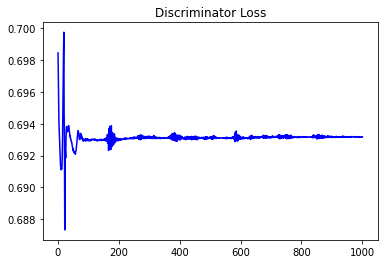

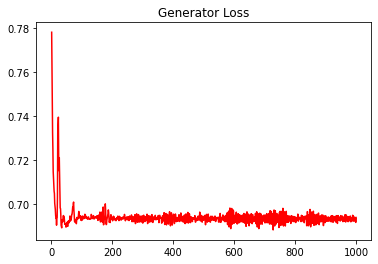

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5683639674071405


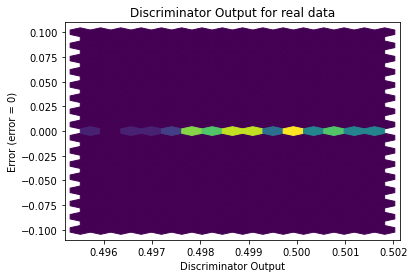

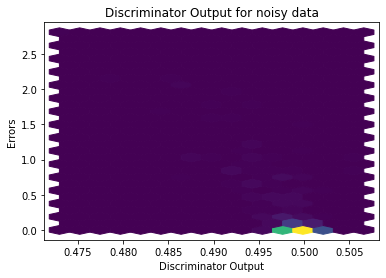

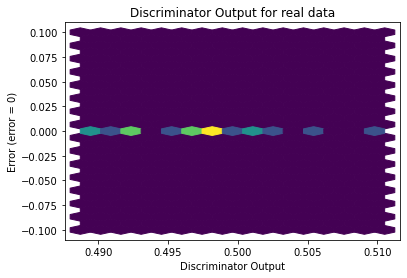

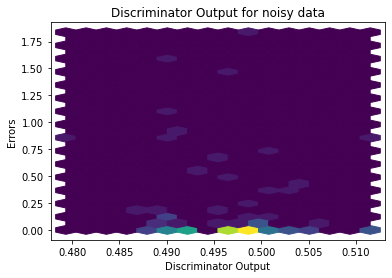

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1307]], requires_grad=True)
